In [25]:
run market_features.py

/Users/evanged/anaconda/lib/python3.6/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


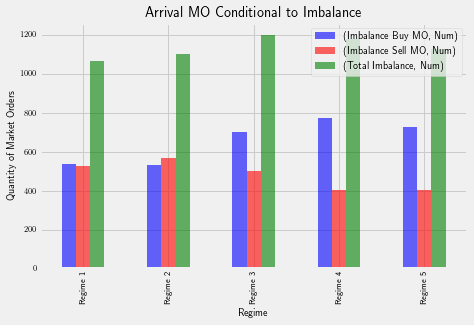

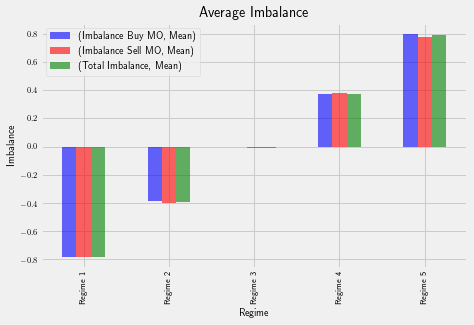

In [27]:
gr=imbalance_regime(lob, trades);

### Number of market orders and mean of order imbalance conditional to order imbalance regime

In [28]:
gr['Total Imbalance']['Num'].sum()

5679.0

### Percentage of market orders conditional to order imbalance

In [29]:
grn=gr.iloc[:,gr.columns.get_level_values(1)=='Num'].transform(lambda x: 100*x/x.sum())
grn.columns=grn.columns.droplevel(1)
grn
#pandas_df_to_markdown_table(grn)

,Imbalance Buy MO,Imbalance Sell MO,Total Imbalance
Regime,,,
Regime 1,16.417455,21.981682,18.770910
Regime 2,16.295392,23.646961,19.404825
Regime 3,21.452548,20.774355,21.165698
Regime 4,23.680195,16.777685,20.760697
Regime 5,22.154410,16.819317,19.897869


### Mean of order imbalance conditional to imbalance regime

In [ ]:
grm=gr.iloc[:,gr.columns.get_level_values(1)=='Mean']#.transform(lambda x: x/x.sum())
grm.columns=grm.columns.droplevel(1)
grm

In [ ]:
lobimb,reg=get_lob_trade_imbalance(lob,trades,'All')

# Dividing the analysis by broker activity

In [ ]:
btg_buy=lobimb[lobimb['Buy Broker']==85]
btg_sell=lobimb[lobimb['Sell Broker']==85]

In [ ]:
btg_buy.count()

In [ ]:
btg_sell.count()

# First, let's correct the Market Orders

In [ ]:
lob_all,reg = get_lob_trade_imbalance(lob,trades,'All')

In [ ]:
lob_all.head()

In [21]:
aggr = {'Count':'count', 'Total Volume':'sum'}
vol_walk_lob = trades.groupby(trades.index)['Volume'].agg(['sum','count'])
vol_walk_lob.columns=['Total Volume', 'Count']
vol_walk_lob.head()

,Total Volume,Count
Report Time,,
2017-10-03 09:00:50.939,1245,103
2017-10-03 09:00:50.948,10,2
2017-10-03 09:00:50.955,10,2
2017-10-03 09:00:50.964,10,2
2017-10-03 09:00:51.291,10,2


In [9]:
dd=drop_rep(trades).join(vol_walk_lob,how='outer')
dd.head()

,Time Frame,Price,Volume,Buy Seq Ord Num,Buy Agressor,Sell Seq Ord Num,Sell Agressor,Cross Indicator,Buy Broker,Sell Broker,sum,count
Report Time,,,,,,,,,,,,
2017-10-03 09:00:50.939,63624733250939,3200.0,5,74882413343,2,74882413583,2,0,120,147,1245,103
2017-10-03 09:00:50.948,63624733250948,3199.5,5,74882413750,2,74882414661,1,0,147,8,10,2
2017-10-03 09:00:50.955,63624733250955,3199.5,5,74882414662,2,74882414764,1,0,3,8,10,2
2017-10-03 09:00:50.964,63624733250964,3199.0,5,74882414666,2,74882414819,1,0,3,8,10,2
2017-10-03 09:00:51.291,63624733251291,3200.0,5,74882414950,1,74882414448,2,0,88,21,10,2


In [ ]:
print(dd.head())

In [ ]:
sum(tra.index==drop_rep(trades).index)

In [ ]:
drop_rep(trades).count()

In [ ]:
trades.groupby(trades.index)['Volume'].agg('count').reset_index(name='Count')

In [ ]:
trades.head()

In [ ]:
trades.count()

In [24]:
["Regime"+str(i) for i in range(1,6)]

['Regime1', 'Regime2', 'Regime3', 'Regime4', 'Regime5']